## Assignment for Week 2 - KNN

### Exercise:

**Data Set:** https://archive.ics.uci.edu/ml/datasets/Heart+Disease <br>
Notice, this is the same dataset that you worked with last week.  Feel free to use your cleaned up data file or you can use the one that I have posted in WorldClass. 

**Objective:** Predict heart disease in patients.

* Get to know your data, start out by data exploration. Summarized your finding.

* Divide the data into training set and test set randomly with ratio 80:20.  Make prediction based on 1-nearest neighbor. What is the error rate of this approach?  Report your results in a confusion matrix.

* Use different values for K, what is the optimal value of K from your experiments? Report the error rate of the optimal K value and its confusion matrix. Is there any improvement (by how much) over 1-nearest neighbor?

* Is there anything else you can do to improve your model? If yes, demonstrate your approach. (Hint: there is always something that you can try, unless your accuracy score is 100%)


### Deliverables:

Upload your notebook's .ipynb file (Also, if you decide to use your heart_disease data set, I'll need a copy of that too. I can't validate your notebook without your dtatset.)
   
**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

# Assignment Solution 

Given heart diseasease data set, We need to do clean the data set, perform EDA, and develop a knn model. 

In [37]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Loading all the required libraries

# Handling data and numerical operations  
import numpy as np
import pandas as pd
import random as rnd

# For plotting and visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Import necessary libraries for machine learning model i.e., Knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Task 1: Get to know your data, start out by data exploration. Summarized your finding.

In [10]:
# Loading the dataset
# We have used the cleaned data set 
Heartdata_df = pd.read_csv('F:/Balaram/ML course/assign_wk2/assign_wk2/heart.disease.data.clean.csv')

In [38]:
#looking at first few columns
Heartdata_df.head(10)

,age,sex,cp,trestbps,chol,cigs,years,fbs,famhist,restecg,thalach,exang,thal,num
0,63,1,1,145,233,50.0,20.0,1,1,2,150,0,6,0
1,67,1,4,160,286,40.0,40.0,0,1,2,108,1,3,2
2,67,1,4,120,229,20.0,35.0,0,1,2,129,1,7,1
3,37,1,3,130,250,0.0,0.0,0,1,0,187,0,3,0
4,41,0,2,130,204,0.0,0.0,0,1,2,172,0,3,0
5,56,1,2,120,236,20.0,20.0,0,1,0,178,0,3,0
6,62,0,4,140,268,0.0,0.0,0,1,2,160,0,3,3
7,57,0,4,120,354,0.0,0.0,0,1,0,163,1,3,0
8,63,1,4,130,254,0.0,0.0,0,0,2,147,0,7,2
9,53,1,4,140,203,20.0,25.0,1,1,2,155,1,7,1


In [12]:
# look at the columns of data
print(Heartdata_df.columns.values)

['age' 'sex' 'cp' 'trestbps' 'chol' 'cigs' 'years' 'fbs' 'famhist'
 'restecg' 'thalach' 'exang' 'thal' 'num']


In [13]:
#information on datasetr to give idea on datatypes of each features
Heartdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    int64  
 1   sex       282 non-null    int64  
 2   cp        282 non-null    int64  
 3   trestbps  282 non-null    int64  
 4   chol      282 non-null    int64  
 5   cigs      282 non-null    float64
 6   years     282 non-null    float64
 7   fbs       282 non-null    int64  
 8   famhist   282 non-null    int64  
 9   restecg   282 non-null    int64  
 10  thalach   282 non-null    int64  
 11  exang     282 non-null    int64  
 12  thal      282 non-null    int64  
 13  num       282 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 31.0 KB


In [14]:
# see the distribution and description of data to understand more aout features
Heartdata_df.describe()

,age,sex,cp,trestbps,chol,cigs,years,fbs,famhist,restecg,thalach,exang,thal,num
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.195035,247.705674,16.836011,15.347364,0.148936,0.620567,1.014184,149.826241,0.326241,4.677305,0.907801
std,9.053083,0.468338,0.955405,16.739821,46.178771,18.876755,15.276814,0.356658,0.486108,0.998118,22.737594,0.469670,1.936386,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,0.000000,0.000000,0.000000,133.250000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,11.976385,15.000000,0.000000,1.000000,2.000000,153.500000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,30.000000,30.000000,0.000000,1.000000,2.000000,165.750000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,170.000000,360.000000,75.000000,54.000000,1.000000,1.000000,2.000000,202.000000,1.000000,7.000000,4.000000


In [16]:
# Check for missing values
print(Heartdata_df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
cigs        0
years       0
fbs         0
famhist     0
restecg     0
thalach     0
exang       0
thal        0
num         0
dtype: int64


In [19]:
# Check unique values for each feature
for column in Heartdata_df.columns:
    print(f"{column}: {Heartdata_df[column].nunique()} unique values")

age: 41 unique values
sex: 2 unique values
cp: 4 unique values
trestbps: 42 unique values
chol: 140 unique values
cigs: 25 unique values
years: 42 unique values
fbs: 2 unique values
famhist: 2 unique values
restecg: 3 unique values
thalach: 89 unique values
exang: 2 unique values
thal: 3 unique values
num: 5 unique values


In [20]:
# Distinguish numerical and categorical features based on unique values
threshold = 10  # Define a threshold for considering a feature as categorical
numerical_features = [col for col in Heartdata_df.columns if Heartdata_df[col].nunique() > threshold]
categorical_features = [col for col in Heartdata_df.columns if Heartdata_df[col].nunique() <= threshold]

print("\nNumerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


Numerical Features: ['age', 'trestbps', 'chol', 'cigs', 'years', 'thalach']
Categorical Features: ['sex', 'cp', 'fbs', 'famhist', 'restecg', 'exang', 'thal', 'num']


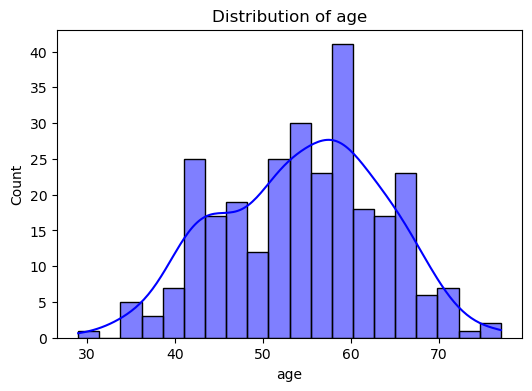

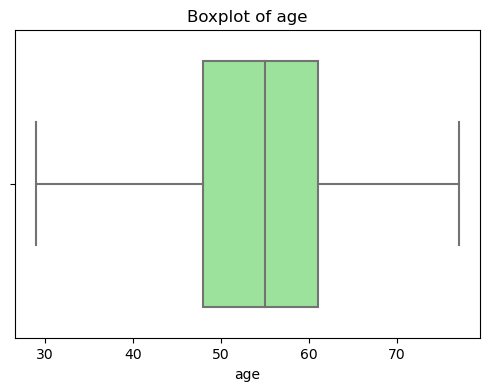

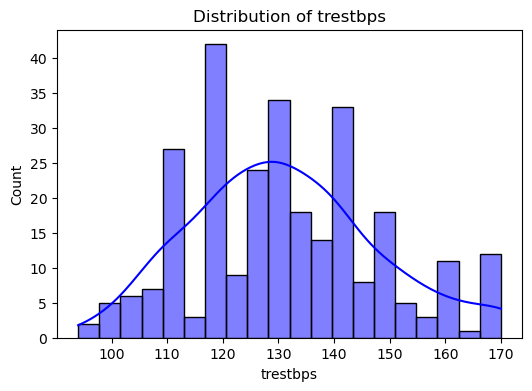

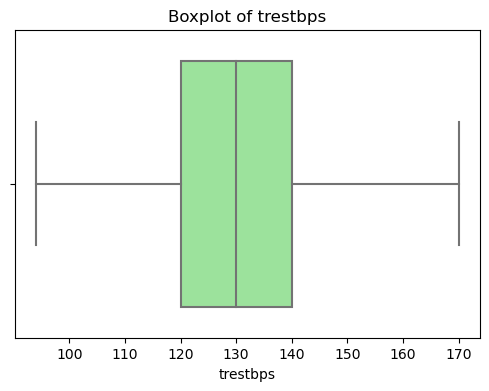

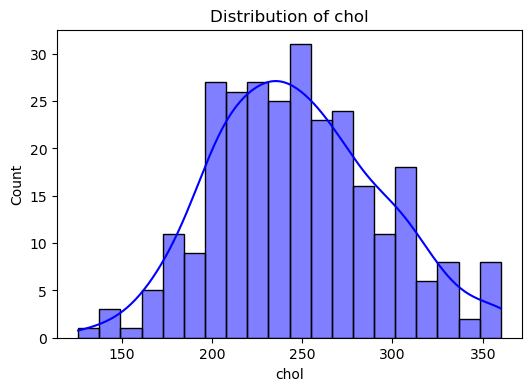

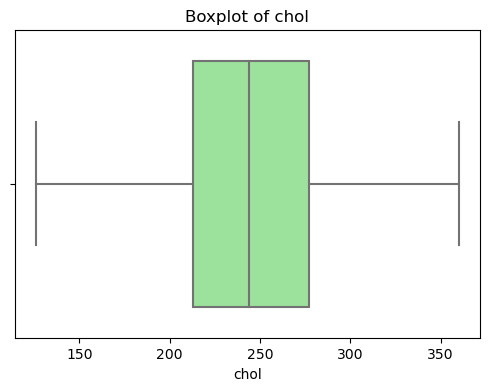

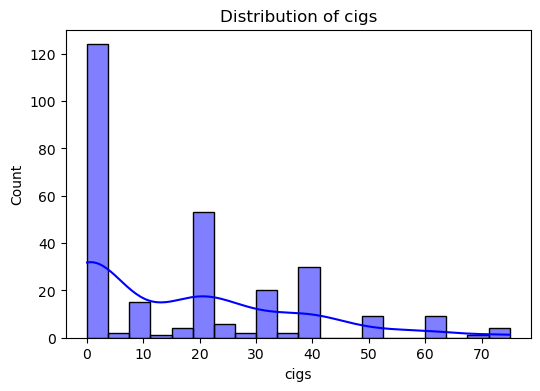

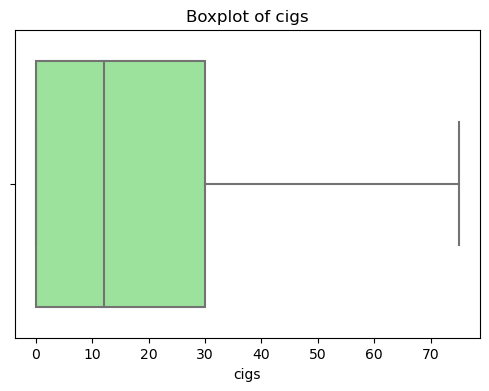

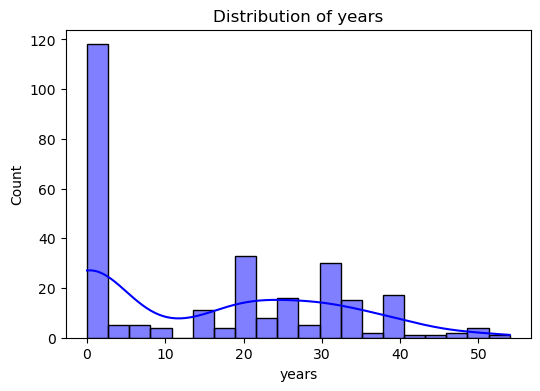

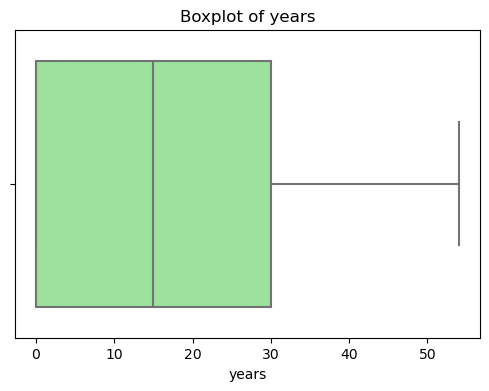

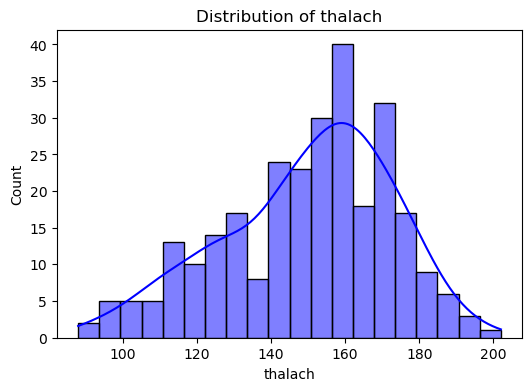

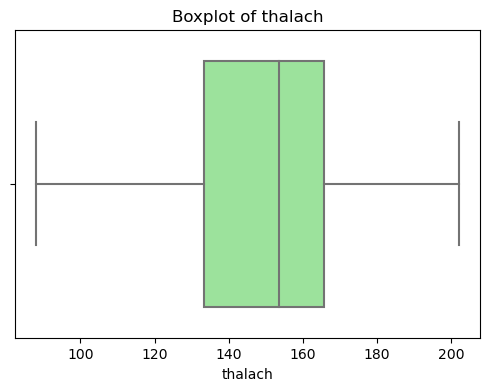

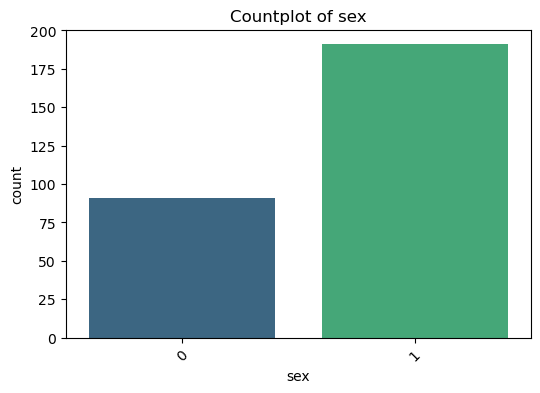

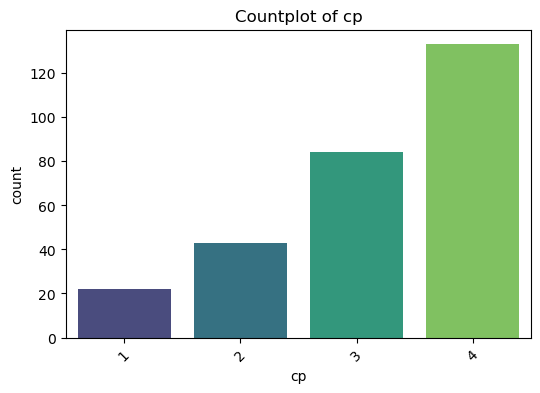

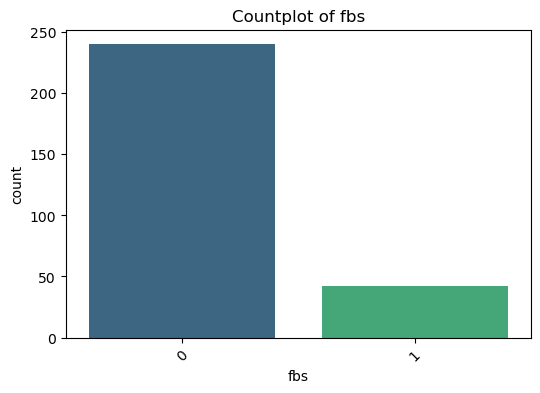

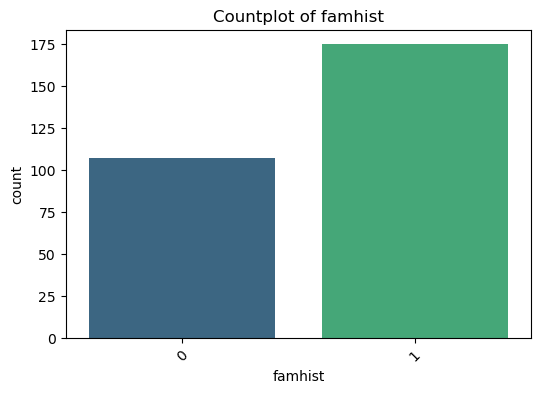

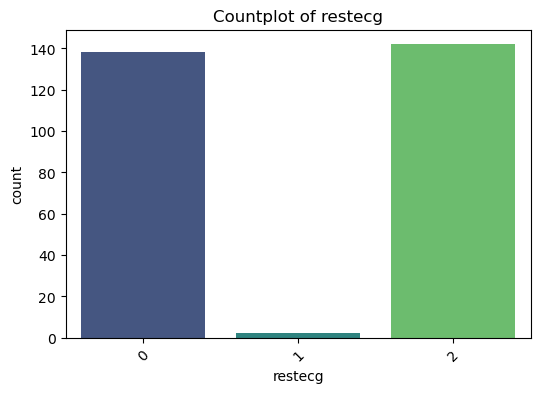

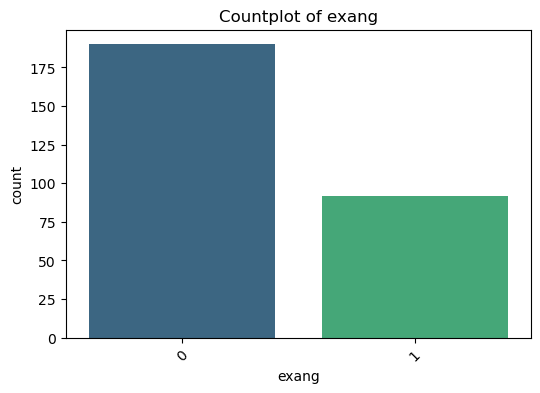

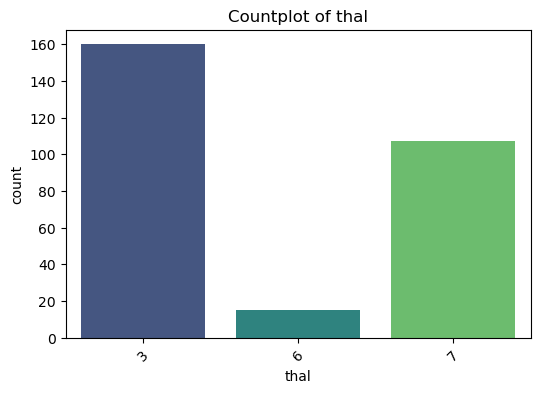

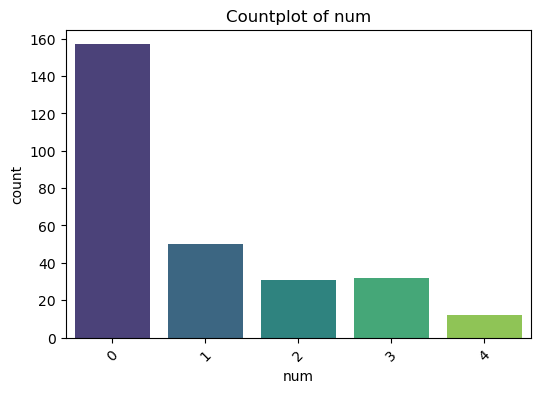

In [35]:
# 1. Univariate Analysis for Numerical Features (Histograms, Boxplots)
for feature in numerical_features:
    # Plot Histogram
    plt.figure(figsize=(6, 4))
    sns.histplot(Heartdata_df[feature], bins=20, kde=True, color='blue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.show()

    # Plot Boxplot (to check for outliers)
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=Heartdata_df[feature], color='lightgreen')
    plt.title(f'Boxplot of {feature}')
    plt.show()

# 2. Univariate Analysis for Categorical Features (Bar plots)
# Analyze categorical features
for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=Heartdata_df[col], palette='viridis')
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

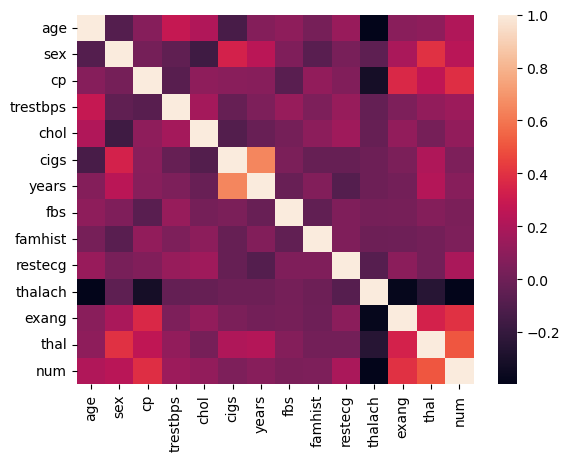

In [36]:
# Bivariate analysis 
# Visualize the correlation heatmap
_ = sns.heatmap(Heartdata_df.corr())

# Summary of Data exploration

1. The Given data set has 14 features, our targert feature is 'num' and the other features can be considered as input features
2. The heart disease data set has 282 datapoints without any missing values
3. Based on statistical analysis:
    1. the people with age group of 29 to 77 
    2. trestbps in the range of 126 to 170 
    3. no of cigs range from 0 to 75
    4. years of smoking 0 to 54
    5. thalach range from 88 to 202
    
4. Based on the number of unique values in each feacture
    1. Numerical Features: are age, trestbps, chol, cigs, years, thalach
    2. Categorical Features: sex, cp, fbs, famhist, restecg, exang, thal, num
5. based on the univariate analysis : the features like chol, cigs and years are not normally distributed and they have skewness. features such as trestbps, chol and cigs have skewness and outliers
6. categorical varables are not equally distributed particularly fbps, restcg, thal
7. Based on correlation matrix, No features are majorly correlated and hence these can not be removed.  

Task 2: Divide the data into training set and test set randomly with ratio 80:20. Make prediction based on 1-nearest neighbor. What is the error rate of this approach? Report your results in a confusion matrix.

In [49]:
# Task 2

# Our target variable is num and thus need to be seperated as target value n
# Separate features and target
if 'num' in Heartdata_df.columns:
    X = Heartdata_df.drop(columns=['num'])
    y = Heartdata_df['num']
else:
    raise ValueError("Target column 'num' not found in the dataset")
    
    
# Dividing the data into training and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# kNN model with 1 neighboure (k=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
#prediction based on 1-nearest neighboure
y_pred = knn.predict(X_test)


# Error rate and performance for K=1
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[20  6  2  1  0]
 [ 8  0  1  0  0]
 [ 0  2  0  3  0]
 [ 4  4  1  0  0]
 [ 3  1  1  0  0]]
Accuracy: 0.3508771929824561
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.69      0.62        29
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         5

    accuracy                           0.35        57
   macro avg       0.11      0.14      0.12        57
weighted avg       0.29      0.35      0.32        57



Task 3: Use different values for K, what is the optimal value of K from your experiments? Report the error rate of the optimal K value and its confusion matrix. Is there any improvement (by how much) over 1-nearest neighbor?

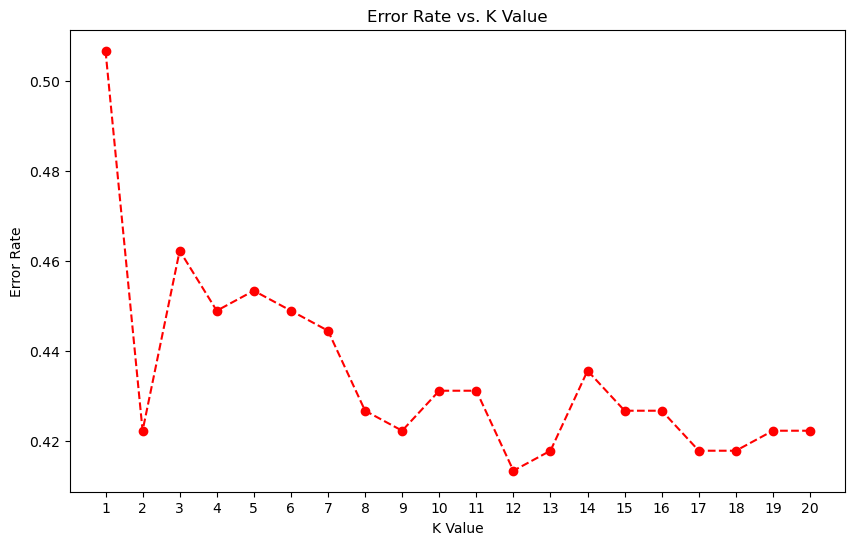

Optimal K: 12
Optimal K Results
Confusion Matrix:
 [[29  0  0  0  0]
 [ 7  2  0  0  0]
 [ 5  0  0  0  0]
 [ 5  3  0  1  0]
 [ 5  0  0  0  0]]
Accuracy: 0.5614035087719298
Classification Report:
               precision    recall  f1-score   support

           0       0.57      1.00      0.72        29
           1       0.40      0.22      0.29         9
           2       0.00      0.00      0.00         5
           3       1.00      0.11      0.20         9
           4       0.00      0.00      0.00         5

    accuracy                           0.56        57
   macro avg       0.39      0.27      0.24        57
weighted avg       0.51      0.56      0.45        57


Accuracy Improvement over K=1: 21.05%


In [50]:
# 4. Optimal K Value
error_rates = []
k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    error_rates.append(1 - scores.mean())

# Plot error rates vs. K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='red')
plt.title("Error Rate vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.xticks(k_values)
plt.show()

# Optimal K
optimal_k = k_values[np.argmin(error_rates)]
print(f"Optimal K: {optimal_k}")

# Evaluate with Optimal K
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred_optimal = knn.predict(X_test)

print("Optimal K Results")
conf_matrix_optimal = confusion_matrix(y_test, y_pred_optimal)
print("Confusion Matrix:\n", conf_matrix_optimal)
print("Accuracy:", accuracy_score(y_test, y_pred_optimal))
print("Classification Report:\n", classification_report(y_test, y_pred_optimal))

# Improvement over K=1
improvement = accuracy_score(y_test, y_pred_optimal) - accuracy_score(y_test, y_pred)
print(f"\nAccuracy Improvement over K=1: {improvement * 100:.2f}%")

Task 4: Is there anything else you can do to improve your model? If yes, demonstrate your approach. (Hint: there is always something that you can try, unless your accuracy score is 100%)

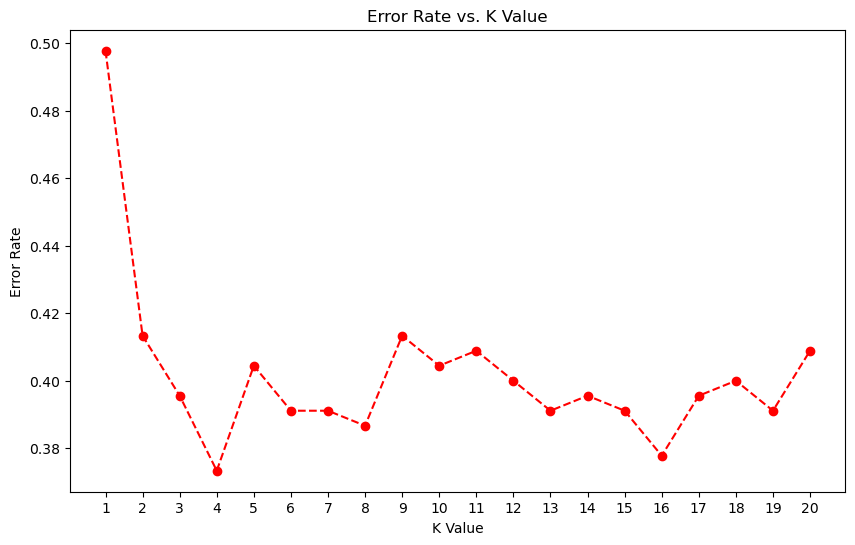

Optimal K: 4
Optimal K Results
Confusion Matrix:
 [[25  3  0  0  1]
 [ 4  2  1  2  0]
 [ 0  3  1  1  0]
 [ 3  1  1  3  1]
 [ 3  1  1  0  0]]
Accuracy: 0.543859649122807
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.86      0.78        29
           1       0.20      0.22      0.21         9
           2       0.25      0.20      0.22         5
           3       0.50      0.33      0.40         9
           4       0.00      0.00      0.00         5

    accuracy                           0.54        57
   macro avg       0.33      0.32      0.32        57
weighted avg       0.50      0.54      0.51        57



In [53]:
# 5. Additional Improvements

# we can check the performance of the model by using normalization

# Separate features and target
if 'num' in Heartdata_df.columns:
    X = Heartdata_df.drop(columns=['num'])
    y = Heartdata_df['num']
else:
    raise ValueError("Target column 'num' not found in the dataset")

# Normalize numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4. Optimal K Value
error_rates = []
k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    error_rates.append(1 - scores.mean())

# Plot error rates vs. K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='red')
plt.title("Error Rate vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.xticks(k_values)
plt.show()

# Optimal K
optimal_k = k_values[np.argmin(error_rates)]
print(f"Optimal K: {optimal_k}")

# Evaluate with Optimal K
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred_optimal = knn.predict(X_test)

print("Optimal K Results")
conf_matrix_optimal = confusion_matrix(y_test, y_pred_optimal)
print("Confusion Matrix:\n", conf_matrix_optimal)
print("Accuracy:", accuracy_score(y_test, y_pred_optimal))
print("Classification Report:\n", classification_report(y_test, y_pred_optimal))

The optimal value of k changed from 12 to 4, but accuracy reduced from the 0.56 to 0.54. 

We can try other techniques, 
1. Do feature engineering and dimentionality reduction using PCA
2. Use different distance metrics such as eucledian, manhanttan etc
3. Using weighted knn techniques
4. Using some other classification algorithms like logistic regresison, SVM classifier etc. also we ca try ensemble Classification algorithms such as random forest, XGBoost and Neural network. 
